In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df.drop("Unnamed: 0",axis=1,inplace = True)

In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [7]:
print(df["Salary"].mean())
print(df["Salary"].max())
print(df["Salary"].min())

76004.0
122392.0
37732.0


In [8]:
import plotly.express as px

fig = px.box(df,y="Salary")
fig.show()

In [9]:


fig =px.scatter(df,x="YearsExperience",y="Salary",trendline="ols")
fig.show()

**Starting Linear Regression**

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
X = df.drop("Salary",axis = 1) # dropping the  target column
y = df["Salary"] # the  target column

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train,y_train)

LinearRegression()

In [15]:
y_predict = model.predict(X_test)

**The metrics**

In [16]:
from sklearn.metrics import r2_score

In [17]:
R2 = r2_score(y_test,y_predict)
print(F"R² : {R2}")

R² : 0.959904769616671


In [18]:
#R2_adjusted
N = len(y_test) # length of the sample
p = X_train.shape[1] # number of features

R2A = 1 - ((1-R2)*(N-1))/(N-p-1)
print(F"R²a : {R2A}")

R²a : 0.9541768795619098


In [19]:
from sklearn.metrics import mean_squared_error

In [20]:
MSE = mean_squared_error(y_test,y_predict)
print(f"MSE : {MSE}")

MSE : 35527633.193605796


In [21]:
RMSE = MSE ** 0.5
print(f"RMSE : {RMSE}")

RMSE : 5960.506118913544


In [22]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_predict)
print(f"MAE : {MAE}")

MAE : 4789.852657349786


In [23]:
import numpy as np
MAPE = np.mean(np.abs(y_test-y_predict)/(y_test)) * 100
print(f"MAPE : {MAPE}")

MAPE : 6.687971442791668


In [24]:
residuos = y_test - y_predict

In [25]:
fig = px.histogram(residuos, title='Residual Distribuition')
fig.update_layout(
    xaxis_title='Residual',
    yaxis_title='Frequency',
    bargap=0.0001
)
fig.show()

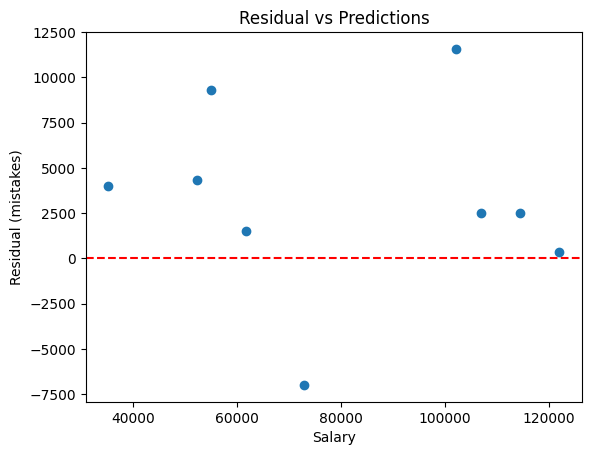

In [26]:
import matplotlib.pyplot as plt
plt.scatter(y_predict, residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Salary')
plt.ylabel('Residual (mistakes)')
plt.title('Residual vs Predictions')
plt.show()


In [27]:
coef = model.coef_
intercept = model.intercept_

print(coef)
print(intercept)

[9422.68417831]
24025.11896358258



**Each year of experience is associated with a mean raise of $9,679.86 in salary**


**For those with 0 years of experience, the base salary is $24,083.15.**